<a href="https://colab.research.google.com/github/dhamvi01/Xgboost-Feature-Elimination/blob/master/Xgb_Feature_Selection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb

#### Import data

In [22]:
a = pd.read_csv('diabetes.csv') #Placed in the data folder
a.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### DP and IDP split

In [4]:
x = a.iloc[:,:-1] #features or dependant variables
y = a[['Outcome']] #Target or dependant variables

#### Feature Importance Plot

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


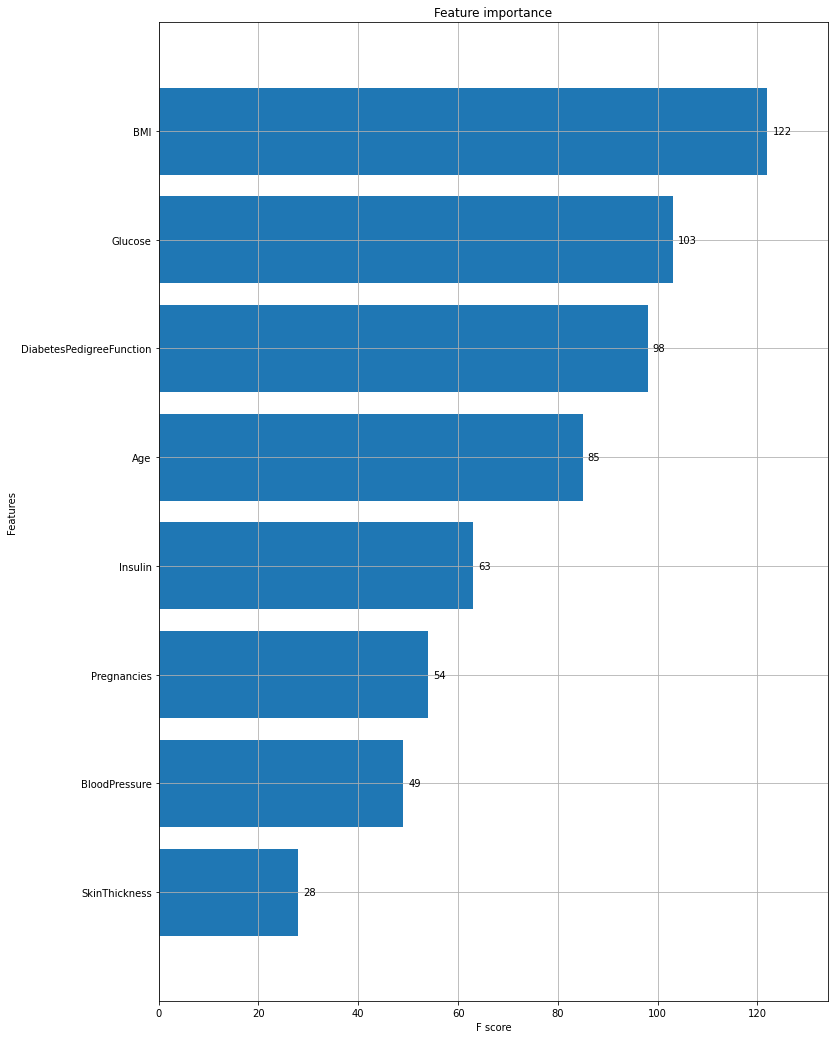

In [5]:
model = xgb.XGBClassifier()
model.fit(x,y)

fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

##### We can observe that top BMI and glocose are most significant variables, we can pick top 5 variables to cover max variation of target

#### feature Selection Process

In [6]:
from sklearn.feature_selection import RFE

model = xgb.XGBClassifier()

rfe = RFE(model,3)
rfe = rfe.fit(x,y)

print(rfe.support_)
print(rfe.ranking_)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[False  True False False False  True False  True]
[2 1 6 5 4 1 3 1]


In [18]:
b = pd.DataFrame()
for i,j,k in zip(x.columns,rfe.support_,rfe.ranking_):
  b = b.append({"Feature" : i, "Selected" : j, "Rank" : k},ignore_index=True)
b

,Feature,Rank,Selected
0,Pregnancies,2.0,0.0
1,Glucose,1.0,1.0
2,BloodPressure,6.0,0.0
3,SkinThickness,5.0,0.0
4,Insulin,4.0,0.0
5,BMI,1.0,1.0
6,DiabetesPedigreeFunction,3.0,0.0
7,Age,1.0,1.0


##### The model is suggesting to keep only 3 variables: Glucose, BMI and Age

#### Feature Selection through Model

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [20]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

model = xgb.XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
acc_score = accuracy_score(y_test,y_pred)
print("Accuracy: %.2f%%" % (acc_score * 100))

import numpy as np
thresh = np.sort(model.feature_importances_)

for t in thresh:
    select = SelectFromModel(model,threshold=t,prefit=True)
    select_xtrain = select.transform(x_train)

    select_model = xgb.XGBClassifier()
    select_model.fit(select_xtrain,y_train)

    select_xtest = select.transform(x_test)
    y_pred_new = select_model.predict(select_xtest)
    z = [round(value) for value in y_pred_new]
    acc_score = accuracy_score(y_test,z)

    print('Thresh=%.3f, n=%d, Accuracy: %.2f%%' % (t,select_xtest.shape[1],acc_score*100))


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Accuracy: 75.97%
Thresh=0.064, n=8, Accuracy: 75.97%
Thresh=0.064, n=7, Accuracy: 74.68%
Thresh=0.087, n=6, Accuracy: 75.32%
Thresh=0.094, n=5, Accuracy: 76.62%
Thresh=0.097, n=4, Accuracy: 74.68%
Thresh=0.144, n=3, Accuracy: 75.32%
Thresh=0.156, n=2, Accuracy: 77.27%
Thresh=0.294, n=1, Accuracy: 73.38%


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

#### We should keep only five variable for optimum model accuracy